#### What is the richest country in the world on a per-person basis?

In [19]:
import pandas as pd
from matplotlib import pyplot as plt

In [75]:
data = pd.read_csv('countries.csv')
data.head()

,country,continent,year,lifeExpectancy,population,gdpPerCapita
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


In [37]:
# My try! - there are multiple rows/entries for each country-year. 
# I didn't take into account mean or latest values
data.sort_values('gdpPerCapita', ascending = False).iloc[0].country

'Kuwait'

In [38]:
# Course - group by country and mean
mean_gdppercapita = data.groupby(['country']).mean().gdpPerCapita
mean_gdppercapita.head()

country
Afghanistan     802.674598
Albania        3255.366633
Algeria        4426.025973
Angola         3607.100529
Argentina      8955.553783
Name: gdpPerCapita, dtype: float64

In [64]:
# gdp per capita
top5 = mean_gdppercapita.sort_values(ascending=False).head()
top5

country
Kuwait           65332.910472
Switzerland      27074.334405
Norway           26747.306554
United States    26261.151347
Canada           22410.746340
Name: gdpPerCapita, dtype: float64

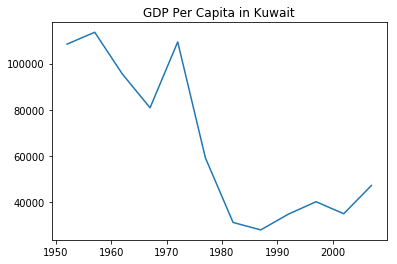

In [31]:
kuwait = data[data.country == 'Kuwait']
plt.plot(kuwait.year, kuwait.gdpPerCapita)
plt.title('GDP Per Capita in Kuwait')
plt.show()
# We can see Kuwait gdp per capita was large then dropped

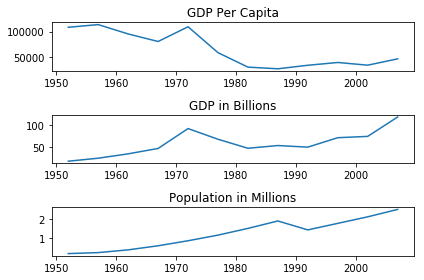

In [33]:
plt.subplot(311)
plt.title('GDP Per Capita')
plt.plot(kuwait.year, kuwait.gdpPerCapita)

plt.subplot(312)
plt.title('GDP in Billions')
plt.plot(kuwait.year, kuwait.population * kuwait.gdpPerCapita /10**9)

plt.subplot(313)
plt.title('Population in Millions')
plt.plot(kuwait.year, kuwait.population /10**6)

plt.tight_layout()
plt.show()

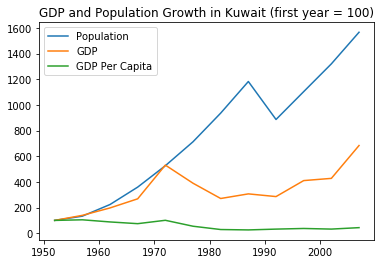

In [36]:
plt.plot(kuwait.year, kuwait.population / kuwait.population.iloc[0] * 100)

kuwait_gdp = kuwait.population * kuwait.gdpPerCapita
plt.plot(kuwait.year, kuwait_gdp / kuwait_gdp.iloc[0] * 100)
plt.plot(kuwait.year, kuwait.gdpPerCapita / kuwait.gdpPerCapita.iloc[0] * 100)
plt.title('GDP and Population Growth in Kuwait (first year = 100)')
plt.legend(['Population', 'GDP', 'GDP Per Capita'])
plt.show()

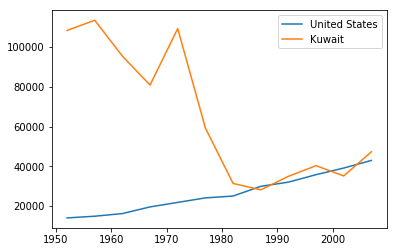

In [40]:
us = data[data.country == 'United States']
plt.plot(us.year, us.gdpPerCapita)
plt.plot(kuwait.year, kuwait.gdpPerCapita)
plt.legend(['United States', 'Kuwait'])
plt.show()

### Second Attempt
Let's look at latest gdp per capita values

In [56]:
# Me, get the latest year for each country
max_year_by_country = data.groupby(['country'])['year'].transform('max')
data_latest_country = data[ data['year'] == max_year_by_country ]
max_gdppercapita = data_latest_country.sort_values('gdpPerCapita', ascending = False)
max_gdppercapita.iloc[0]. country

'Norway'

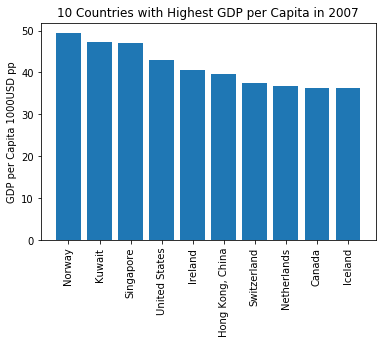

In [76]:
top10_gdppercapita = max_gdppercapita.head(10)
x = range(10)
plt.bar(x, top10_gdppercapita.gdpPerCapita / 1000)
plt.xticks(x, top10_gdppercapita.country, rotation='vertical')
plt.title('10 Countries with Highest GDP per Capita in 2007')
plt.ylabel('GDP per Capita 1000USD pp')
plt.show();

## What's the fastest growing country in GDP?

In [74]:
group_by_country = data.groupby(['country'])
#group_by_country['gdp'] = group_by_country.gdpPerCapita * group_by_country.population

#group_by_country = data.groupby(['country'])
#group_by_country.['gdpPe'].pct_change() + 1
group_by_country.head()

,country,continent,year,lifeExpectancy,population,gdpPerCapita
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106
12,Albania,Europe,1952,55.230,1282697,1601.056136
13,Albania,Europe,1957,59.280,1476505,1942.284244
14,Albania,Europe,1962,64.820,1728137,2312.888958
15,Albania,Europe,1967,66.220,1984060,2760.196931
16,Albania,Europe,1972,67.690,2263554,3313.422188


## Which country resembles the U.S. the most?

## How is population related to GDP per capita?